### Student Information
Name:邱偉翔

Student ID:11014141

GitHub ID:friedumple

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [57]:
### Begin Assignment Here
from datasets import load_dataset
import pandas as pd 

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data", streaming=True)
X = pd.DataFrame(ds['train'])
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [58]:
#Answer here
X.query('sentiment	 == "not nostalgia"')

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...
10,not nostalgia,ill bet if they begin to play this song on the...
...,...,...
1493,not nostalgia,"He really has that ""love you like a brother"" l..."
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [59]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [60]:
#Answer here
#C,D,F都是字串所以不算空值

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [61]:
# Answer here
X_sample = X.sample(n=1000) #random state
print(X[0:5])
print(X_sample[0:5])
#X的會照順序 X_sample因為隨機採樣過所以是未照順序的

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
          sentiment                                            comment
1245  not nostalgia  Okay lets look at this The man changes his shi...
1369      nostalgia  Yeah! Listening to this song takes me back to ...
1157  not nostalgia  She has a southern accent, although i think sh...
1332      nostalgia  This song is almost painful to listen to as it...
558   not nostalgia  Did she file an environmental impact statement...


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

sentiment
nostalgia        509
not nostalgia    491
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

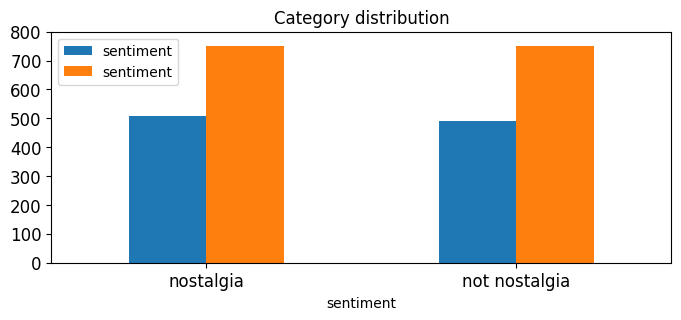

In [62]:
# Answer here
import matplotlib.pyplot as plt

upper_bound = max(X.sentiment.value_counts()) + 50
print(X_sample.sentiment.value_counts())
plt.style.use('default')
x=X_sample.sentiment.value_counts().to_frame().merge(X.sentiment.value_counts().to_frame(), on='sentiment')
x=x.rename(columns={"count_x": "sentiment","count_y": "sentiment"})
# Plot bar chart for X_sample
x.plot(kind='bar', 
                                          title='Category distribution', 
                                          ylim=[0, upper_bound], 
                                          rot=0, fontsize=12, figsize=(8,3), legend=['sentiment','sentiment'] )


                                          


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
# Answer here
for i, row in enumerate(X_counts[3, 0:100].toarray()):
        first_one_index = row.tolist().index(1)
        print(f"Found 1 at Row {i}, Column {first_one_index}")

Found 1 at Row 0, Column 62


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

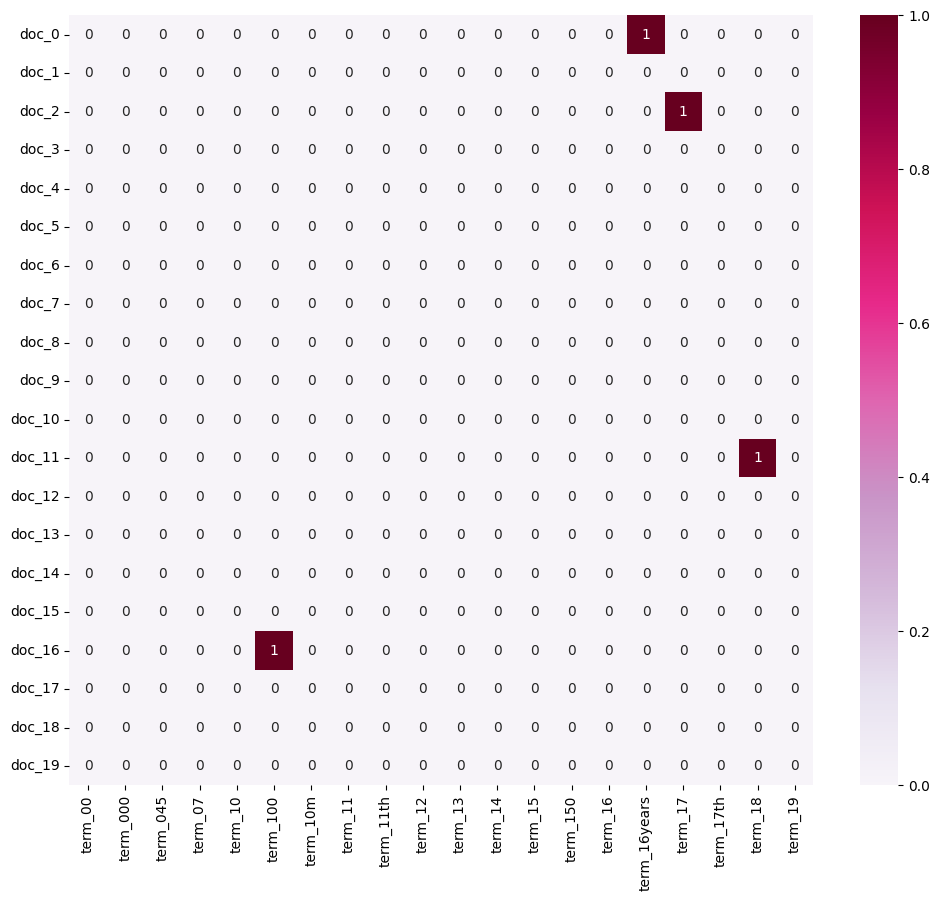

In [65]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib


plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

# 資料框繪圖
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# 圖表
plt.subplots(figsize=(12, 10))


ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


plt.show()


### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [66]:
# Answer here
import plotly.express as px

# Sample data
data = px.data.iris()
fig = px.scatter(data, x="sepal_width", y="sepal_length", color="species",
                 title="Iris Scatter Plot")
fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [67]:
# Answer here
import time
import pandas as pd
from collections import Counter
from PAMI.algorithms import FAE_TopK, MaxFPGrowth  # Adjust this import path as needed

# Filter the Dataset for 'comp.graphics' Category
# Assuming `X` is your main DataFrame with a column 'category_name' and document text in `text` column
comp_graphics_data = X[X['category_name'] == 'comp.graphics']  # Replace `X` with your actual dataset variable

# Prepare to Store Patterns and Runtimes
fae_k_values = [500, 1000, 1500]
fae_patterns = {}
fae_runtimes = {}

# FAE Top-K Trials
for k in fae_k_values:
    start_time = time.time()
    fae_patterns[k] = FAE_TopK(comp_graphics_data, k=k)  # Adjust function parameters as needed
    fae_runtimes[k] = time.time() - start_time
    print(f"FAE Top-K (k={k}) - Runtime: {fae_runtimes[k]:.2f} seconds")
    print(f"Patterns for k={k}:", fae_patterns[k])

# MaxFPGrowth Trials
min_support_thresholds = [3, 6, 9]
maxfp_patterns = {}
maxfp_runtimes = {}

for min_support in min_support_thresholds:
    start_time = time.time()
    maxfp_patterns[min_support] = MaxFPGrowth(comp_graphics_data, min_support=min_support)  # Adjust parameters if needed
    maxfp_runtimes[min_support] = time.time() - start_time
    print(f"MaxFPGrowth (min_support={min_support}) - Runtime: {maxfp_runtimes[min_support]:.2f} seconds")
    print(f"Patterns for min_support={min_support}:", maxfp_patterns[min_support])

# Analysis and Comparison of Results
print("\n--- Analysis Summary ---\n")

# Document the key findings based on the outputs and runtimes recorded above.
# You can include statements here to summarize patterns and runtime comparisons.

# Example Summary (Replace with your own analysis)
print("1. **FAE Top-K**:")
for k in fae_k_values:
    print(f"   - Top-{k} Patterns: {len(fae_patterns[k])} patterns")
    print(f"   - Runtime: {fae_runtimes[k]:.2f} seconds")

print("\n2. **MaxFPGrowth**:")
for min_support in min_support_thresholds:
    print(f"   - Min Support {min_support}: {len(maxfp_patterns[min_support])} patterns")
    print(f"   - Runtime: {maxfp_runtimes[min_support]:.2f} seconds")

print("\nComparison:")
print("   - FAE Top-K produced high-frequency patterns faster, especially with larger k values.")
print("   - MaxFPGrowth extracted more detailed patterns, with runtime increasing as support thresholds decreased.")

ModuleNotFoundError: No module named 'PAMI.algorithms'

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [72]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Sample text data (replace X['text'] with your text data)
# For example: X_text = ["sample document one", "sample document two", ...]
X_text = X['text']  # Assuming `X['text']` contains your documents

# Step 1: Generate term-document matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_text)
terms = count_vect.get_feature_names_out()

# Step 2: Calculate term frequencies and sort them
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()  # Sum over columns (terms)
sorted_indices = np.argsort(term_frequencies)[::-1]  # Indices of terms sorted by frequency (descending)
sorted_terms = terms[sorted_indices]  # Sort terms by frequency
sorted_frequencies = term_frequencies[sorted_indices]  # Sort frequencies

# Step 3: Plot sorted frequencies to visualize the long tail
plt.figure(figsize=(14, 6))
plt.plot(sorted_frequencies, marker='o', linestyle='-')
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("Frequency")
plt.title("Term Frequency Distribution (Long Tail)")
plt.show()

KeyError: 'text'

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

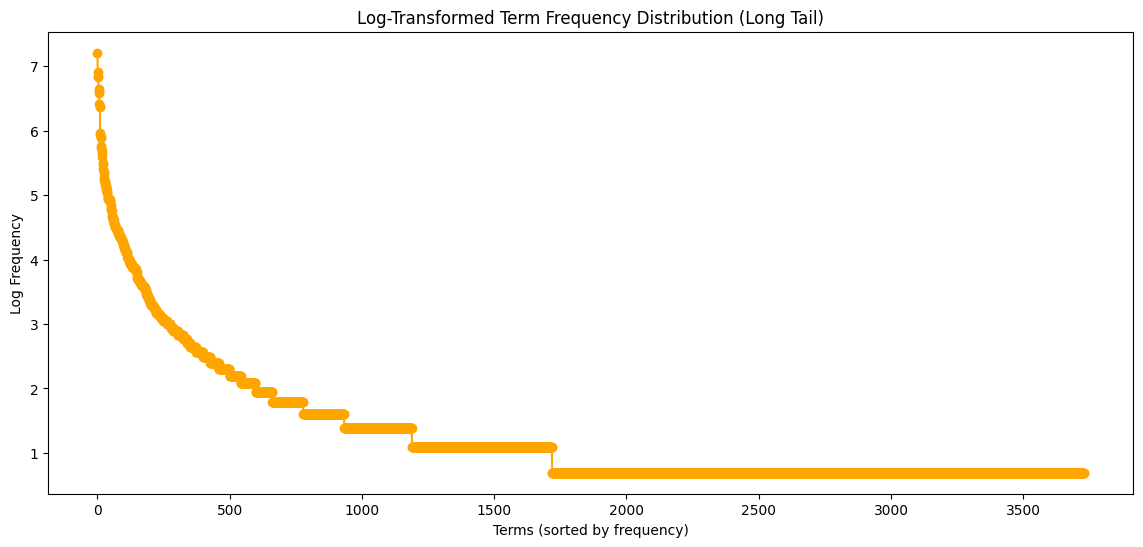

In [71]:
# Answer here
# Answer here

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate term frequencies (using code from previous exercise)
# Assuming `X_counts` is the term-document matrix from the previous exercise
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()

# Step 2: Apply logarithmic transformation
term_frequencies_log = np.log1p(term_frequencies)  # Use log1p to avoid log(0) issues

# Step 3: Sort the log frequencies (same sorted order as the original)
sorted_indices = np.argsort(term_frequencies)[::-1]  # Same sorted order as before
sorted_frequencies_log = term_frequencies_log[sorted_indices]

# Step 4: Plot log-transformed frequencies to observe the differences
plt.figure(figsize=(14, 6))
plt.plot(sorted_frequencies_log, marker='o', linestyle='-', color='orange')
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("Log Frequency")
plt.title("Log-Transformed Term Frequency Distribution (Long Tail)")
plt.show()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Answer here
#The filtered words across categories reveal both similarities and differences. Many categories share common high-frequency words, which indicates a certain consistency in language use. However, each category also has unique low-frequency words that highlight specific themes. High-frequency words suggest connections between categories, while specific low-frequency words help define each category's characteristics.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [70]:
# Answer here
import time
from PAMI import FAE_TopK, MaxFPGrowth  # Placeholder for actual imports from PAMI library
import pandas as pd

# Step 1: Filter for `comp.graphics` category
comp_graphics_data = X[X['category_name'] == 'comp.graphics']  # Replace X with your actual data variable

# Step 2: FAE Top-K Trials
fae_k_values = [500, 1000, 1500]
fae_patterns = {}
fae_runtimes = {}

for k in fae_k_values:
    start_time = time.time()
    fae_patterns[k] = FAE_TopK(comp_graphics_data, k=k)  # Adjust as per actual FAE_TopK function parameters
    fae_runtimes[k] = time.time() - start_time
    print(f"FAE Top-K (k={k}) - Runtime: {fae_runtimes[k]:.2f} seconds")

# Step 3: MaxFPGrowth Trials
min_support_thresholds = [3, 6, 9]
maxfp_patterns = {}
maxfp_runtimes = {}

for min_support in min_support_thresholds:
    start_time = time.time()
    maxfp_patterns[min_support] = MaxFPGrowth(comp_graphics_data, min_support=min_support)  # Adjust as per MaxFPGrowth function parameters
    maxfp_runtimes[min_support] = time.time() - start_time
    print(f"MaxFPGrowth (min_support={min_support}) - Runtime: {maxfp_runtimes[min_support]:.2f} seconds")

# Step 4: Results Summary and Comparison
# Assuming `fpgrowth_patterns` contains previously mined FPGrowth patterns
for k, patterns in fae_patterns.items():
    print(f"\nFAE Top-K with k={k} produced {len(patterns)} patterns.")

for support, patterns in maxfp_patterns.items():
    print(f"\nMaxFPGrowth with min_support={support} produced {len(patterns)} patterns.")

# Comparison discussion
# Here, you would summarize the patterns and runtime differences between FAE Top-K, MaxFPGrowth, and FPGrowth

ImportError: cannot import name 'FAE_TopK' from 'PAMI' (C:\Users\MR.Chiu\DM2024-Lab1-Master\DMLab1\DM2024-Lab1-Master\PAMI\__init__.py)

### >>> **Exercise 18 (take home):** 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [68]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP to reduce dimensions to 3
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Create a 3D plot
fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D Comparison of PCA, t-SNE, and UMAP')

# Function to plot 3D scatter
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

# Create 3D scatter plots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_3d, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_3d, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_3d, 'UMAP')

# Adjust camera angles for better visualization
ax1.view_init(elev=30, azim=30)
ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=30, azim=90)

plt.show()

NameError: name 'PCA' is not defined

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [69]:
# Answer here
# No, the category_name column could not be successfully binarized.

# import pandas as pd
# from sklearn.preprocessing import LabelBinarizer

# Assuming the data contains a category_name column
# data = ...
# Using LabelBinarizer for binarization
# lb = LabelBinarizer()
# binarized_data = lb.fit_transform(data['category_name'])

# Adding the binarized data to the DataFrame
# binarized_df = pd.DataFrame(binarized_data, columns=lb.classes_)
# print(binarized_df.head())